In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/recommenedfashion/img.zip .

In [ ]:
!unzip img.zip

Streaming output truncated to the last 5000 lines.
  inflating: img/Woven_Dolphin_Shorts/img_00000027.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000028.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000029.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000030.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000031.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000032.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000033.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000034.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000035.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000036.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000037.jpg  
   creating: img/Woven_Drawstring_Joggers/
  inflating: img/Woven_Drawstring_Joggers/img_00000001.jpg  
  inflating: img/Woven_Drawstring_Joggers/img_00000002.jpg  
  inflating: img/Woven_Drawstring_Joggers/img_00000003.jpg  
  inflating: img/Woven_Drawstring_Joggers/img_00000004.jpg  
  inflating: img/Woven_Drawstring_J

In [ ]:
import pandas as pd
import numpy as np
import cv2

path = '/content/data.csv'
df = pd.read_csv(path)

image_path_array = df['image_path'].to_numpy()
label_array = df['category'].to_numpy()
x1 = df['x1'].to_numpy().astype(np.float32)
y1 = df['y1'].to_numpy().astype(np.float32)
x2 = df['x2'].to_numpy().astype(np.float32)
y2 = df['y2'].to_numpy().astype(np.float32)

for i in range(len(image_path_array)):
    path = image_path_array[i]
    img = cv2.imread(path)
    if img is None:
        continue
    h = img.shape[0]
    w = img.shape[1]

    x1[i] = x1[i] * 1.0 /w
    x2[i] = x2[i] * 1.0/ w
    y1[i] = y1[i] * 1.0/ h
    y2[i] = y2[i] * 1.0/ h

df['x1'] = pd.DataFrame(x1)
df['y1'] = pd.DataFrame(y1)
df['x2'] = pd.DataFrame(x2)
df['y2'] = pd.DataFrame(y2)

df.to_csv('/content/test_modified.csv', index=False)
print(df.head())



                                          image_path  ...  category_old
0        img/Layered-Collar_Sweater/img_00000030.jpg  ...            16
1     img/Striped_V-Neck_Cotton_Tee/img_00000061.jpg  ...            18
2      img/Faux_Suede_Fringe_Jacket/img_00000042.jpg  ...            11
3  img/Reason_Statue_of_Liberty_Mesh_Tank/img_000...  ...            17
4            img/Squiggle_Print_Tee/img_00000012.jpg  ...            18

[5 rows x 9 columns]


In [ ]:
pip uninstall tensorflow

Uninstalling tensorflow-1.14.0:
  Would remove:
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-1.14.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.14.0


In [ ]:
pip install tensorflow==1.14.0

  Using cached https://files.pythonhosted.org/packages/f4/28/96efba1a516cdacc2e2d6d081f699c001d414cc8ca3250e6d59ae657eb2b/tensorflow-1.14.0-cp37-cp37m-manylinux1_x86_64.whl
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.14.0 which is incompatible.


In [ ]:


'''
This file defines all hyper-parameters regarding training
'''
import tensorflow as tf
import tensorflow.compat.v1 as tf
FLAGS = tf.app.flags.FLAGS
# Hyper-parameters about saving path and data loading path
tf.app.flags.DEFINE_string('version', 'exp1', '''version number of this experiment''')

tf.app.flags.DEFINE_string('train_path', '/content/train_modified2.csv', '''path to the train image
list csv''')
tf.app.flags.DEFINE_string('vali_path', '/content/test_modified.csv', '''path to the validation
image list csv''')
tf.app.flags.DEFINE_string('test_path', '/content/test_modified.csv', '''path to the test image list
csv''')
tf.app.flags.DEFINE_string('fc_path', 'data/downloaded_test_fc.csv', '''path to save the feature
layer values of the test data''')
tf.app.flags.DEFINE_string('test_ckpt_path', 'cache/logs_v3_9/min_model.ckpt-27280',
                           '''checkpoint to load when testing''')
tf.app.flags.DEFINE_string('ckpt_path', 'logs_v3_10/model.ckpt-59999',
                           '''checkpoint to load when continue training''')
## Hyper-paramters about training
tf.app.flags.DEFINE_float('weight_decay', 0.00025, '''scale for l2 regularization''')
tf.app.flags.DEFINE_float('fc_weight_decay', 0.00025, '''scale for fully connected layer's l2
regularization''')
tf.app.flags.DEFINE_float('learning_rate', 0.01, '''Learning rate''')
tf.app.flags.DEFINE_boolean('continue_train_ckpt', False, '''Whether to continue training from a
checkpoint''')
## Hyper-parameters about the model
tf.app.flags.DEFINE_integer('num_residual_blocks', 2, '''number of residual blocks in ResNet''')
tf.app.flags.DEFINE_boolean('is_localization', True, '''Add localization task or not''')








/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:

import sys
from absl import app
# Addresses `UnrecognizedFlagError: Unknown command line flag 'f'`
sys.argv = sys.argv[:1]

# `app.run` calls `sys.exit`
try:
  app.run(lambda argv: None)
except:
  pass

In [ ]:

'''
This python file is responsible for the image processing
'''
import cv2
import numpy as np
import pandas as pd
#from hyper_parameters import *

shuffle = True
localization =tf.app.flags.FLAGS.is_localization
imageNet_mean_pixel = [103.939, 116.799, 123.68]
global_std = 68.76

IMG_ROWS = 64
IMG_COLS = 64


def get_image(path, x1, y1, x2, y2):
    '''
    :param path: image path
    :param x1: the upper left and lower right coordinates to localize the apparels
    :param y1:
    :param x2:
    :param y2:
    :return: a numpy array with dimensions [img_row, img_col, img_depth]
    '''
    img = cv2.imread(path)
    if localization is True:
        if img is None or img.shape[0] == 0 or img.shape[1] == 0:
            print(path)
            img = np.zeros((1, IMG_ROWS, IMG_COLS, 0))
      #  print(type(img), img.shape)    
        img = cv2.resize(img, (IMG_ROWS, IMG_COLS))
        assert img.shape == (IMG_ROWS, IMG_COLS, 3)
    else:
      #  print(type(img), img.shape)
        img = cv2.resize(img, (IMG_ROWS, IMG_COLS))

    img = img.reshape(1, IMG_ROWS, IMG_COLS, 3)

    return img


def load_data_numpy(df):
    '''
    :param df: a pandas dataframe with the image paths and localization coordinates
    :return: the numpy representation of the images and the corresponding labels
    '''
    num_images = len(df)
    image_path_array = df['image_path'].to_numpy()
    label_array = df['category'].to_numpy()
    x1 = df['x1'].to_numpy().reshape(-1, 1)
    y1 = df['y1'].to_numpy().reshape(-1, 1)
    x2 = df['x2'].to_numpy().reshape(-1, 1)
    y2 = df['y2'].to_numpy().reshape(-1, 1)
    bbox_array = np.concatenate((x1, y1, x2, y2), axis=1)
    image_array = np.array([]).reshape(-1, IMG_ROWS, IMG_COLS, 3)
    adjusted_std = 1.0/np.sqrt(IMG_COLS * IMG_ROWS * 3)
    for i in range(num_images):
        img = get_image(image_path_array[i], x1=x1[i, 0], y1=y1[i, 0], x2=x2[i, 0], y2=y2[i, 0])
        flip_indicator = np.random.randint(low=0, high=2)
        if flip_indicator == 0:
            img[0, ...] = cv2.flip(img[0, ...], 1)
        image_array = np.concatenate((image_array, img))
    image_array = (image_array - imageNet_mean_pixel) / global_std

    # Convert to BGR image for pre-train vgg16
    assert image_array.shape[1:] == (IMG_ROWS, IMG_COLS, 3)
    # image_array = image_array.transpose((0, 3, 1, 2))
    return image_array, label_array, bbox_array


def prepare_df(path, usecols, shuffle=shuffle):
    '''
    :param path: the path of a csv file
    :param usecols: which columns to read
    :return: a pandas dataframe
    '''
    df = pd.read_csv(path, usecols=usecols)
    if shuffle is True:
        order = np.random.permutation(len(df))
        df = df.iloc[order, :]
    return df


In [ ]:

'''
This is the resnet structure. More detailed comments can be found on
https://github.com/wenxinxu/resnet-in-tensorflow
'''
#tf.disable_v2_behavior()
#from hyper_parameters import *
import tensorflow as tf
BN_EPSILON = 0.001
NUM_LABELS = 6
def activation_summary(x):
    '''
    :param x: A Tensor
    :return: Add histogram summary and scalar summary of the sparsity of the tensor
    '''
    tensor_name = x.op.name
    # tf.histogram_summary(tensor_name + '/activations', x)
    # tf.scalar_summary(tensor_name + '/sparsity', tf.nn.zero_fraction(x))
def create_variables(name, shape, initializer=tf.contrib.layers.xavier_initializer(), is_fc_layer=False):
    '''
    :param name: A string. The name of the new variable
    :param shape: A list of dimensions
    :param initializer: User Xavier as default.
    :param is_fc_layer: Want to create fc layer variable? May use different weight_decay for fc
    layers.
    :return: The created variable
    '''
    if is_fc_layer is True:
        regularizer = tf.contrib.layers.l2_regularizer(scale=FLAGS.fc_weight_decay)
    else:
        regularizer = tf.contrib.layers.l2_regularizer(scale=FLAGS.weight_decay)

    new_variables = tf.get_variable(name, shape=shape, initializer=initializer,
                                    regularizer=regularizer)
    return new_variables

def output_layer(input_layer, num_labels):
    input_dim = input_layer.get_shape().as_list()[-1]
    fc_w = create_variables(name='fc_weights', shape=[input_dim, num_labels], is_fc_layer=True,
                            initializer=tf.uniform_unit_scaling_initializer(factor=1.0))

    fc_b = create_variables(name='fc_bias', shape=[num_labels], initializer=tf.zeros_initializer)

    fc_w2 = create_variables(name='fc_weights2', shape=[input_dim, 4], is_fc_layer=True,
                            initializer=tf.uniform_unit_scaling_initializer(factor=1.0))
    fc_b2 = create_variables(name='fc_bias2', shape=[4], initializer=tf.zeros_initializer)


    fc_h = tf.matmul(input_layer, fc_w) + fc_b
    fc_h2 = tf.matmul(input_layer, fc_w2) + fc_b2
    return fc_h, fc_h2


def conv_bn_relu_layer(input_layer, filter_shape, stride, second_conv_residual=False,
                       relu=True):
    out_channel = filter_shape[-1]
    if second_conv_residual is False:
        filter = create_variables(name='conv', shape=filter_shape)
    else: filter = create_variables(name='conv2', shape=filter_shape)
    conv_layer = tf.nn.conv2d(input_layer, filter, strides=[1, stride, stride, 1], padding='SAME')
    mean, variance = tf.nn.moments(conv_layer, axes=[0, 1, 2])

    if second_conv_residual is False:
        beta = tf.get_variable('beta', out_channel, tf.float32,
                               initializer=tf.constant_initializer(0.0, tf.float32))
        gamma = tf.get_variable('gamma', out_channel, tf.float32,
                                initializer=tf.constant_initializer(1.0, tf.float32))
    else:
        beta = tf.get_variable('beta_second_conv', out_channel, tf.float32,
                               initializer=tf.constant_initializer(0.0, tf.float32))
        gamma = tf.get_variable('gamma_second_conv', out_channel, tf.float32,
                                initializer=tf.constant_initializer(1.0, tf.float32))

    bn_layer = tf.nn.batch_normalization(conv_layer, mean, variance, beta, gamma, BN_EPSILON)
    if relu:
        output = tf.nn.relu(bn_layer)
    else:
        output = bn_layer
    return output

def bn_relu_conv_layer(input_layer, filter_shape, stride, second_conv_residual=False):
    in_channel = input_layer.get_shape().as_list()[-1]
    mean, variance = tf.nn.moments(input_layer, axes=[0, 1, 2])

    if second_conv_residual is False:
        beta = tf.get_variable('beta', in_channel, tf.float32,
                               initializer=tf.constant_initializer(0.0, tf.float32))
        gamma = tf.get_variable('gamma', in_channel, tf.float32,
                                initializer=tf.constant_initializer(1.0, tf.float32))
    else:
        beta = tf.get_variable('beta_second_conv', in_channel, tf.float32,
                               initializer=tf.constant_initializer(0.0, tf.float32))
        gamma = tf.get_variable('gamma_second_conv', in_channel, tf.float32,
                                initializer=tf.constant_initializer(1.0, tf.float32))

    bn_layer = tf.nn.batch_normalization(input_layer, mean, variance, beta, gamma, BN_EPSILON)
    relu_layer = tf.nn.relu(bn_layer)

    if second_conv_residual is False:
        filter = create_variables(name='conv', shape=filter_shape)
    else: filter = create_variables(name='conv2', shape=filter_shape)
    conv_layer = tf.nn.conv2d(relu_layer, filter, strides=[1, stride, stride, 1], padding='SAME')
    return conv_layer



def residual_block_new(input_layer, output_channel, first_block=False):
    input_channel = input_layer.get_shape().as_list()[-1]
    if input_channel * 2 == output_channel:
        increase_dim = True
        stride = 2
    elif input_channel == output_channel:
        increase_dim = False
        stride = 1
    else:
        raise ValueError('Output and input channel does not match in residual blocks!!!')
    if first_block:
        filter = create_variables(name='conv', shape=[3, 3, input_channel, output_channel])
        conv1 = tf.nn.conv2d(input_layer, filter=filter, strides=[1, 1, 1, 1], padding='SAME')
    else:
        conv1 = bn_relu_conv_layer(input_layer, [3, 3, input_channel, output_channel], stride)
    conv2 = bn_relu_conv_layer(conv1, [3, 3, output_channel, output_channel], 1,
                               second_conv_residual=True)
    if increase_dim is True:
        pooled_input = tf.nn.avg_pool(input_layer, ksize=[1, 2, 2, 1],
                                      strides=[1, 2, 2, 1], padding='SAME')
        padded_input = tf.pad(pooled_input, [[0, 0], [0, 0], [0, 0], [input_channel // 2,
                                                                     input_channel // 2]])
    else:
        padded_input = input_layer
    output = conv2 + padded_input
    return output


def inference(input_tensor_batch, n, reuse, keep_prob_placeholder):
    '''
    total layers = 1 + 2n + 2n + 2n +1 = 6n + 2
    '''
    layers = []
    with tf.variable_scope('conv0', reuse=reuse):
        conv0 = conv_bn_relu_layer(input_tensor_batch, [3, 3, 3, 16], 1)
        # activation_summary(conv0)
        layers.append(conv0)

    for i in range(n):
        with tf.variable_scope('conv1_%d' %i, reuse=reuse):
            if i == 0:
                conv1 = residual_block_new(layers[-1], 16, first_block=True)
            else:
                conv1 = residual_block_new(layers[-1], 16)
            # activation_summary(conv1)
            layers.append(conv1)

    for i in range(n):
        with tf.variable_scope('conv2_%d' %i, reuse=reuse):
            conv2 = residual_block_new(layers[-1], 32)
            # activation_summary(conv2)
            layers.append(conv2)

    for i in range(n):
        with tf.variable_scope('conv3_%d' %i, reuse=reuse):
            conv3 = residual_block_new(layers[-1], 64)
            layers.append(conv3)
        # assert conv3.get_shape().as_list()[1:] == [16, 16, 64]

    with tf.variable_scope('fc', reuse=reuse):
        in_channel = layers[-1].get_shape().as_list()[-1]
        mean, variance = tf.nn.moments(layers[-1], axes=[0, 1, 2])
        beta = tf.get_variable('beta', in_channel, tf.float32,
                               initializer=tf.constant_initializer(0.0, tf.float32))
        gamma = tf.get_variable('gamma', in_channel, tf.float32,
                                initializer=tf.constant_initializer(1.0, tf.float32))

        bn_layer = tf.nn.batch_normalization(layers[-1], mean, variance, beta, gamma, BN_EPSILON)
        relu_layer = tf.nn.relu(bn_layer)


        global_pool = tf.reduce_mean(relu_layer, [1, 2])

        assert global_pool.get_shape().as_list()[-1:] == [64]
        cls_output, bbx_output = output_layer(global_pool, NUM_LABELS)
        layers.append(cls_output)
        layers.append(bbx_output)

    return cls_output, bbx_output, global_pool


I0713 16:15:17.307790 140122773190528 utils.py:157] NumExpr defaulting to 2 threads.


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0713 16:15:17.614833 140122773190528 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:

'''
This is the main training profile. More detailed illustration can be found on
https://github.com/wenxinxu/resnet-in-tensorflow
'''
#from fashion_input import *
import os
import tensorflow as tf
import time
from datetime import datetime
#from simple_resnet import *
#from hyper_parameters import *

TRAIN_DIR = 'logs_' + FLAGS.version + '/'
TRAIN_LOG_PATH = FLAGS.version + '_error.csv'

REPORT_FREQ = 50
TRAIN_BATCH_SIZE = 32
VALI_BATCH_SIZE = 25
TEST_BATCH_SIZE = 25
FULL_VALIDATION = False
Error_EMA = 0.98

STEP_TO_TRAIN = 2000
DECAY_STEP0 = 25000
DECAY_STEP1 = 35000

def generate_validation_batch(df):
    '''
    :param df: a pandas dataframe with validation image paths and the corresponding labels
    :return: two random numpy arrays: validation_batch and validation_label
    '''
    offset = np.random.choice(len(df) - VALI_BATCH_SIZE, 1)[0]
    validation_df = df.iloc[offset:offset+VALI_BATCH_SIZE, :]

    validation_batch, validation_label, validation_bbox_label = load_data_numpy(validation_df)
    return validation_batch, validation_label, validation_bbox_label


class Train:
    '''
    The class defining the training process and relevant helper functions
    '''
    def __init__(self):
        self.placeholders()

    def loss(self, logits, bbox, labels, bbox_labels):

        labels = tf.cast(labels, tf.int64)
        cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels, name='cross_entropy_per_example')
        mse_loss = tf.reduce_mean(tf.losses.mean_squared_error(bbox_labels, bbox), name='mean_square_loss')
        cross_entropy_mean = tf.reduce_mean(cross_entropy, name='cross_entropy')
        return cross_entropy_mean + mse_loss

    def top_k_error(self, predictions, labels, k):

        batch_size = predictions.get_shape().as_list()[0]
        in_top1 = tf.to_float(tf.nn.in_top_k(predictions, labels, k=1))
        num_correct = tf.reduce_sum(in_top1)

        return (batch_size - num_correct) / float(batch_size)


    def placeholders(self):
        self.image_placeholder = tf.placeholder(dtype=tf.float32, shape=[TRAIN_BATCH_SIZE,
                                                                        IMG_ROWS, IMG_COLS, 3])
        self.label_placeholder = tf.placeholder(dtype=tf.int32, shape=[TRAIN_BATCH_SIZE])
        self.bbox_placeholder = tf.placeholder(dtype=tf.float32, shape=[TRAIN_BATCH_SIZE, 4])

        self.vali_image_placeholder = tf.placeholder(dtype=tf.float32, shape=[VALI_BATCH_SIZE,
                                                                IMG_ROWS, IMG_COLS, 3])
        self.vali_label_placeholder = tf.placeholder(dtype=tf.int32, shape=[VALI_BATCH_SIZE])
        self.vali_bbox_placeholder = tf.placeholder(dtype=tf.float32, shape=[VALI_BATCH_SIZE, 4])

        self.lr_placeholder = tf.placeholder(dtype=tf.float32, shape=[])
        self.dropout_prob_placeholder = tf.placeholder(dtype=tf.float32, shape=[])


    def train_operation(self, global_step, total_loss, top1_error):

        tf.summary.scalar('learning_rate', self.lr_placeholder)
        tf.summary.scalar('train_loss', total_loss)
        tf.summary.scalar('train_top1_error', top1_error)

        ema = tf.train.ExponentialMovingAverage(0.95, global_step)
        train_ema_op = ema.apply([total_loss, top1_error])
        tf.summary.scalar('train_top1_error_avg', ema.average(top1_error))
        tf.summary.scalar('train_loss_avg', ema.average(total_loss))

        opt = tf.train.MomentumOptimizer(learning_rate=self.lr_placeholder, momentum=0.9)
        train_op = opt.minimize(total_loss, global_step=global_step)
        return train_op, train_ema_op


    def validation_op(self, validation_step, top1_error, loss):
        ema = tf.train.ExponentialMovingAverage(0.0, validation_step)
        ema2 = tf.train.ExponentialMovingAverage(0.95, validation_step)
        val_op = tf.group(validation_step.assign_add(1), ema.apply([top1_error, loss]),
                          ema2.apply([top1_error, loss]))
        top1_error_val = ema.average(top1_error)
        top1_error_avg = ema2.average(top1_error)
        loss_val = ema.average(loss)
        loss_val_avg = ema2.average(loss)
        tf.summary.scalar('val_top1_error', top1_error_val)
        tf.summary.scalar('val_top1_error_avg', top1_error_avg)
        tf.summary.scalar('val_loss', loss_val)
        tf.summary.scalar('val_loss_avg', loss_val_avg)
        return val_op


    def full_validation(self, validation_df, sess, vali_loss, vali_top1_error, batch_data, batch_label, batch_bbox):
        num_batches = len(validation_df) // VALI_BATCH_SIZE
        error_list = []
        loss_list = []

        for i in range(num_batches):
            offset = i * VALI_BATCH_SIZE
            vali_batch_df = validation_df.iloc[offset:offset+VALI_BATCH_SIZE, :]
            validation_image_batch, validation_labels_batch, validation_bbox_batch = load_data_numpy(vali_batch_df)

            vali_error, vali_loss_value = sess.run([vali_top1_error, vali_loss],
                                              {self.image_placeholder: batch_data,
                                                     self.label_placeholder: batch_label,
                                                    self.bbox_placeholder:batch_bbox,
                                                     self.vali_image_placeholder: validation_image_batch,
                                                     self.vali_label_placeholder: validation_labels_batch,
                                                    self.vali_bbox_placeholder: validation_bbox_batch,
                                                     self.lr_placeholder: FLAGS.learning_rate,
                                                     self.dropout_prob_placeholder: 0.5})
            error_list.append(vali_error)
            loss_list.append(vali_loss_value)

        return np.mean(error_list), np.mean(loss_list)



    def train(self):
        train_df = prepare_df(FLAGS.train_path, usecols=['image_path', 'category', 'x1', 'y1',
                                                       'x2', 'y2'])
        vali_df = prepare_df(FLAGS.vali_path, usecols=['image_path', 'category', 'x1', 'y1', 'x2','y2'])
        num_train = len(train_df)
        global_step = tf.Variable(0, trainable=False)
        validation_step = tf.Variable(0, trainable=False)
        logits, bbox, _ = inference(self.image_placeholder, n=FLAGS.num_residual_blocks, reuse=False,
                                    keep_prob_placeholder=self.dropout_prob_placeholder)
        vali_logits, vali_bbox, _ = inference(self.vali_image_placeholder, n=FLAGS.num_residual_blocks,
                                         reuse=True, keep_prob_placeholder=self.dropout_prob_placeholder)
        reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)

        loss = self.loss(logits, bbox, self.label_placeholder, self.bbox_placeholder)
        full_loss = tf.add_n([loss] + reg_losses)
        predictions = tf.nn.softmax(logits)
        top1_error = self.top_k_error(predictions, self.label_placeholder, 1)

        vali_loss = self.loss(vali_logits, vali_bbox, self.vali_label_placeholder, self.vali_bbox_placeholder)
        vali_predictions = tf.nn.softmax(vali_logits)
        vali_top1_error = self.top_k_error(vali_predictions, self.vali_label_placeholder, 1)


        train_op, train_ema_op = self.train_operation(global_step, full_loss, top1_error)
        val_op = self.validation_op(validation_step, vali_top1_error, vali_loss)

        saver = tf.train.Saver(tf.all_variables())
        summary_op = tf.summary.merge_all()
        init = tf.initialize_all_variables()
        sess = tf.Session()

        if FLAGS.continue_train_ckpt is True:
            print('Model restored!')
            saver.restore(sess, FLAGS.ckpt_path)
        else:
            sess.run(init)
        summary_writer = tf.summary.FileWriter(TRAIN_DIR, sess.graph)
        step_list = []
        train_error_list = []
        vali_error_list = []
        min_error = 0.5
        for step in range(STEP_TO_TRAIN):
            offset = np.random.choice(num_train - TRAIN_BATCH_SIZE, 1)[0]

            train_batch_df = train_df.iloc[offset:offset+TRAIN_BATCH_SIZE, :]
            batch_data, batch_label, batch_bbox = load_data_numpy(train_batch_df)

            vali_image_batch, vali_labels_batch, vali_bbox_batch = generate_validation_batch(vali_df)

            start_time = time.time()

            if step == 0:
                if FULL_VALIDATION is True:
                    top1_error_value, vali_loss_value = self.full_validation(vali_df,
                                                                             sess=sess,
                                                            vali_loss=vali_loss,
                                                            vali_top1_error=vali_top1_error,
                                                            batch_data=batch_data,
                                                            batch_label=batch_label,
                                                            batch_bbox=batch_bbox)
                    vali_summ = tf.Summary()
                    vali_summ.value.add(tag='full_validation_error',
                                    simple_value=top1_error_value.astype(np.float))
                    vali_summ.value.add(tag='full_validation_loss',
                                    simple_value=vali_loss_value.astype(np.float))
                    summary_writer.add_summary(vali_summ, step)
                    summary_writer.flush()

                else:
                    _, top1_error_value, vali_loss_value = sess.run([val_op, vali_top1_error,
                                                                     vali_loss],
                                                    {self.image_placeholder: batch_data,
                                                     self.label_placeholder: batch_label,
                                                     self.vali_image_placeholder: vali_image_batch,
                                                     self.vali_label_placeholder: vali_labels_batch,
                                                     self.lr_placeholder: FLAGS.learning_rate,
                                                     self.bbox_placeholder: batch_bbox,
                                                     self.vali_bbox_placeholder: vali_bbox_batch,
                                                     self.dropout_prob_placeholder: 1.0})
                print('Validation top1 error = %.4f' % top1_error_value)
                print('Validation loss = ', vali_loss_value)
                print('----------------------------')


            _, _, loss_value, train_top1_error = sess.run([train_op, train_ema_op, loss,
                    top1_error], {self.image_placeholder: batch_data,
                                  self.label_placeholder: batch_label,
                                  self.bbox_placeholder: batch_bbox,
                                  self.vali_image_placeholder: vali_image_batch,
                                  self.vali_label_placeholder: vali_labels_batch,
                                  self.vali_bbox_placeholder: vali_bbox_batch,
                                  self.lr_placeholder: FLAGS.learning_rate,
                                  self.dropout_prob_placeholder: 0.5})
            duration = time.time() - start_time

            if step % REPORT_FREQ == 0:
                summary_str = sess.run(summary_op, {self.image_placeholder: batch_data,
                                                    self.label_placeholder: batch_label,
                                                    self.bbox_placeholder: batch_bbox,
                                                    self.vali_image_placeholder: vali_image_batch,
                                                    self.vali_label_placeholder: vali_labels_batch,
                                                    self.vali_bbox_placeholder: vali_bbox_batch,
                                                    self.lr_placeholder: FLAGS.learning_rate,
                                                    self.dropout_prob_placeholder: 0.5})
                summary_writer.add_summary(summary_str, step)


                num_examples_per_step = TRAIN_BATCH_SIZE
                examples_per_sec = num_examples_per_step / duration
                sec_per_batch = float(duration)

                format_str = ('%s: step %d, loss = %.4f (%.1f examples/sec; %.3f ' 'sec/batch)')
                print (format_str % (datetime.now(), step, loss_value, examples_per_sec, sec_per_batch))
                print('Train top1 error = ', train_top1_error)

                if FULL_VALIDATION is True:
                    top1_error_value, vali_loss_value = self.full_validation(vali_df,
                                                                             sess=sess,
                                                            vali_loss=vali_loss,
                                                            vali_top1_error=vali_top1_error,
                                                            batch_data=batch_data,
                                                            batch_label=batch_label,
                                                            batch_bbox=batch_bbox)
                    vali_summ = tf.Summary()
                    vali_summ.value.add(tag='full_validation_error',
                                    simple_value=top1_error_value.astype(np.float))
                    vali_summ.value.add(tag='full_validation_loss',
                                    simple_value=vali_loss_value.astype(np.float))
                    summary_writer.add_summary(vali_summ, step)
                    summary_writer.flush()

                else:

                    _, top1_error_value, vali_loss_value = sess.run([val_op, vali_top1_error,
                                                                 vali_loss],
                                                {self.image_placeholder: batch_data,
                                                 self.label_placeholder: batch_label,
                                                 self.bbox_placeholder: batch_bbox,
                                                 self.vali_image_placeholder: vali_image_batch,
                                                 self.vali_label_placeholder: vali_labels_batch,
                                                 self.vali_bbox_placeholder: vali_bbox_batch,
                                                 self.lr_placeholder: FLAGS.learning_rate,
                                                 self.dropout_prob_placeholder: 0.5})

                print('Validation top1 error = %.4f' % top1_error_value)
                print('Validation loss = ', vali_loss_value)
                print('----------------------------')

                if top1_error_value < min_error:
                    min_error = top1_error_value
                    checkpoint_path = os.path.join(TRAIN_DIR, 'min_model.ckpt')
                    saver.save(sess, checkpoint_path, global_step=step)
                    print('Current lowest error = ', min_error)

                step_list.append(step)
                train_error_list.append(train_top1_error)
                vali_error_list.append(top1_error_value)


            if step == DECAY_STEP0 or step == DECAY_STEP1:
                FLAGS.learning_rate = FLAGS.learning_rate * 0.1


            if step % 10000 == 0 or (step + 1) == STEP_TO_TRAIN:
                checkpoint_path = os.path.join(TRAIN_DIR, 'model.ckpt')
                saver.save(sess, checkpoint_path, global_step=step)

                error_df = pd.DataFrame(data={'step':step_list, 'train_error':
                    train_error_list, 'validation_error': vali_error_list})
                error_df.to_csv(TRAIN_DIR + TRAIN_LOG_PATH, index=False)

            if (step + 1) == STEP_TO_TRAIN:
                checkpoint_path = os.path.join(TRAIN_DIR, 'model.ckpt')
                saver.save(sess, checkpoint_path, global_step=step)

                error_df = pd.DataFrame(data={'step': step_list, 'train_error':
                    train_error_list, 'validation_error': vali_error_list})
                error_df.to_csv(TRAIN_DIR + TRAIN_LOG_PATH, index=False)

        print('Training finished!!')

    def test(self):
        self.test_image_placeholder = tf.placeholder(dtype=tf.float32, shape=[25, IMG_ROWS,
                                                                              IMG_COLS, 3])
        self.test_label_placeholder = tf.placeholder(dtype=tf.int32, shape=[25])

        ##########################
        # Build test graph
        logits, global_pool = inference(self.test_image_placeholder, n=FLAGS.num_residual_blocks, reuse=False,
                                              keep_prob_placeholder=self.dropout_prob_placeholder)
        predictions = tf.nn.softmax(logits)
        test_error = self.top_k_error(predictions, self.test_label_placeholder, 1)

        saver = tf.train.Saver(tf.all_variables())
        sess = tf.Session()
        saver.restore(sess, FLAGS.test_ckpt_path)
        print('Model restored!')
        ##########################

        test_df = prepare_df(FLAGS.test_path, usecols=['image_path', 'category', 'x1', 'y1', 'x2', 'y2'], shuffle=False)
        test_df = test_df.iloc[-25:, :]

        prediction_np = np.array([]).reshape(-1, 6)
        fc_np = np.array([]).reshape(-1, 64)
        # Hack here: 25 as batch size. 50000 images in total
        for step in range(len(test_df) // TEST_BATCH_SIZE):
            if step % 100 == 0:
                print('Testing %i batches...' %step)
                if step != 0:
                    print('Test_error = ', test_error_value)

            df_batch = test_df.iloc[step*25 : (step+1)*25, :]
            test_batch, test_label = load_data_numpy(df_batch)

            prediction_batch_value, test_error_value = sess.run([predictions, test_error],
                                                               feed_dict={
                self.test_image_placeholder:test_batch, self.test_label_placeholder: test_label})
            fc_batch_value = sess.run(global_pool, feed_dict={
                self.test_image_placeholder:test_batch, self.test_label_placeholder: test_label})

            prediction_np = np.concatenate((prediction_np, prediction_batch_value), axis=0)
            fc_np = np.concatenate((fc_np, fc_batch_value))

        print('Predictin array has shape ', fc_np.shape)
        np.save(FLAGS.fc_path, fc_np[-5:,:])

train = Train()
train.train()
# train.test()



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


W0713 16:15:25.297699 140122773190528 deprecation.py:506] From <ipython-input-7-ad8d0a1a5aff>:71: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


W0713 16:15:25.774123 140122773190528 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/util/deprecation.py:507: UniformUnitScaling.__init__ (from tensorflow.python.ops.init_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


W0713 16:15:25.989514 140122773190528 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use `tf.cast` instead.


W0713 16:15:26.011275 140122773190528 deprecation.py:323] From <ipython-input-8-ed13f5eca709>:58: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
Please use tf.global_variables instead.


W0713 16:15:27.673998 140122773190528 deprecation.py:323] From <ipython-input-8-ed13f5eca709>:169: all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Please use tf.global_variables instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


W0713 16:15:27.766791 140122773190528 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/util/tf_should_use.py:193: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Validation top1 error = 0.7600
Validation loss =  2.2331681
----------------------------
2021-07-13 16:15:30.701886: step 0, loss = 28212.9980 (16.5 examples/sec; 1.936 sec/batch)
Train top1 error =  0.84375
Validation top1 error = 0.6400
Validation loss =  73.26486
----------------------------
2021-07-13 16:16:27.697535: step 50, loss = 2438.5010 (31.0 examples/sec; 1.033 sec/batch)
Train top1 error =  0.875
Validation top1 error = 0.8400
Validation loss =  20405.484
----------------------------
2021-07-13 16:17:24.452538: step 100, loss = 1484.8628 (30.4 examples/sec; 1.052 sec/batch)
Train top1 error =  0.8125
Validation top1 error = 0.8400
Validation loss =  25898.393
----------------------------
2021-07-13 16:18:20.865030: step 150, loss = 1284.1761 (29.6 examples/sec; 1.079 sec/batch)
Train top1 error =  0.78125
Validation top1 error = 0.8400
Validation loss =  26863.15
----------------------------
2021-07-13 16:19:17.355128: step 200, loss = 1611.2748 (30.4 examples/sec; 1.053 s

In [ ]:
import seaborn as sns

def plot_history(STEP_TO_TRAIN, i=0):
    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(1,2,figsize = (20,10))

    axs[0].plot(history.history['Train top1 error'])
    axs[0].plot(history.history['Validation top1 error'])
    #axs[0].set_title('model accuracy')
    axs[0].set_ylabel('Train top1 erro')
    axs[0].set_xlabel('step')
    axs[0].legend(['train_error', 'validation_error'], loc='upper left')


    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
   # axs[1].set_title('model loss')
    axs[1].set_ylabel('loss')
    axs[1].set_xlabel('step')
    axs[1].legend(['train_error', 'validation_error'], loc='upper left')

    fig.savefig('history%d.jpg' %i)

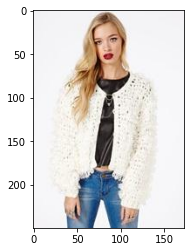

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.imshow(cv2.imread(path)[:,:,::-1])

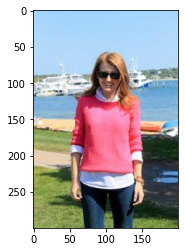

In [ ]:
plt.imshow(cv2.imread('img/Layered-Collar_Sweater/img_00000030.jpg')[:,:,::-1])

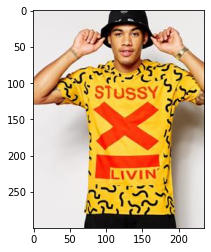

In [ ]:
plt.imshow(cv2.imread('img/Squiggle_Print_Tee/img_00000012.jpg')[:,:,::-1])